In [1]:
import numpy as np
from bcnf.debug.debug_plotting import debug_plotting
from bcnf.simulation.observation import simple_2D_camera_observation
from bcnf.simulation.physics import physics_ODE_simulation

In [8]:
x0 = [0, 0, 1.8]
w = np.array([0, 0, 0.0001])

[-15.125        0.          -9.80496623]
[-15.12492749   0.          -9.80496623]
[-15.12492749   0.          -9.80496623]
[-15.12485498   0.          -9.80496623]
[-15.12485498   0.          -9.80496623]
[-15.05612099   0.          -9.80496618]
[-15.05612049   0.          -9.80496618]
[-14.98782137   0.          -9.80496583]
[-14.98782038   0.          -9.80496583]
[-14.91995155   0.          -9.8049649 ]
[-14.91995057   0.          -9.8049649 ]
[-14.74711353   0.          -9.80495765]
[-14.74711097   0.          -9.80495765]
[-14.57702787   0.          -9.80493929]
[-14.57703087   0.          -9.80493929]
[-14.40964488   0.          -9.8049045 ]
[-14.40964519   0.          -9.8049045 ]
[-14.24489004   0.          -9.80484785]
[-14.24489034   0.          -9.80484785]
[-13.8591008    0.          -9.80458864]
[-13.85910306   0.          -9.80458864]
[-13.48735793   0.          -9.80409109]
[-13.48735638   0.          -9.80409109]
[-13.12888863   0.          -9.80327195]
[-13.12888675   

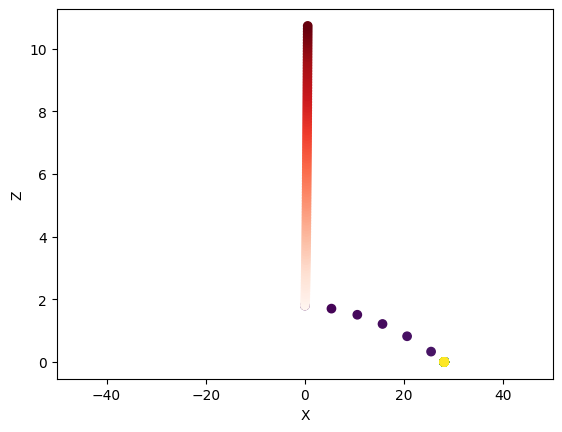

In [16]:
p1 = physics_ODE_simulation(x0=x0, w=w, v0=np.array([55, 0, 0]), m = 10)
p2 = physics_ODE_simulation(x0=x0, w=w, v0=np.array([55, 0, 0]), m = 0.001)

p1 = simple_2D_camera_observation(p1, noise=False, std=0.05)
p2 = simple_2D_camera_observation(p2, noise=False, std=0.05)

debug_plotting(p1, p2)

In [58]:
import numpy as np

def rotate_vector(vector, 
                  angle_degrees):  #angle [+45 and 45]
    # Convert angle from degrees to radians
    angle_radians = angle_degrees * np.pi / 180
    
    # tranfor vector to spherical coorinates
    r = np.linalg.norm(vector)
    theta = np.arccos(vector[2] / r)
    phi = np.arctan2(vector[1], vector[0])
    print(theta)
    # Update the spherical coordinates
    theta -= angle_radians

    # Transform the spherical coordinates back to Cartesian coordinates
    rotated_vector = np.array([r * np.sin(theta) * np.cos(phi),
                               r * np.sin(theta) * np.sin(phi), 
                               r * np.cos(theta)])
    
    return rotated_vector

# Example usage
vector = np.array([0.707, 0.707, 1])  # Example normalized 3D vector
angle_degrees = 90  # Example rotation angle
vector = vector / np.linalg.norm(vector)
rotated_vector = rotate_vector(vector, angle_degrees)
print("Original Vector:", vector)
print("Rotated Vector:", rotated_vector)
#vector = rotated_vector

0.7853226519949396
Original Vector: [0.49996224 0.49996224 0.70716017]
Rotated Vector: [-0.50003775 -0.50003775  0.70705338]


In [56]:
rotate_vector(rotated_vector, angle_degrees)

array([0.57735027, 0.57735027, 0.57735027])

In [21]:
from bcnf.simulation.physics import physics_ODE_simulation
from bcnf.simulation.camera import record_trajectory
import numpy as np

traj = physics_ODE_simulation(x0 = np.array([0, 0, 1.8]),      # initial position
                            v0 = np.array([0, 25, 25]),     # initial velocity
                            g = np.array([0, 0, -9.81]),     # gravitational acceleration
                            w = np.array([-5, 5, 5]),      # wind
                            b = 0.1,                              # drag coefficient
                            m = 0.25,                              # mass
                            rho = 1.225,                          # air density
                            r = 0.1,                              # radius of ball
                            a = np.array([0, 0, 0]),         # thrust
                            T = 4.0,                             # total run time in seconds
                            dt = 1/30)                             # time step

[ -2.88675135 -85.5015963  -95.11024535]
[ -2.88675135 -85.49922294 -95.10746034]
[ -2.88675135 -85.499223   -95.10746042]
[ -2.88675135 -85.49684973 -95.10467555]
[ -2.88675135 -85.4968498  -95.10467563]
[ -2.88675135 -85.14397742 -94.69074668]
[ -2.88675135 -85.14397531 -94.69074351]
[ -2.88675135 -84.79323936 -94.27960297]
[ -2.88675135 -84.79323517 -94.27959671]
[ -2.88675135 -84.44461665 -93.87121624]
[ -2.88675135 -84.4446125  -93.87121005]
[ -2.88675134 -83.22372338 -92.44321455]
[ -2.88675134 -83.22370298 -92.44318458]
[ -2.88675134 -83.43798216 -92.69357308]
[ -2.88675134 -83.43796813 -92.69355239]
[ -2.88675132 -82.44883041 -91.53861101]
[ -2.88675132 -82.44884685 -91.5386361 ]
[ -2.8867513  -81.47685149 -90.40587416]
[ -2.8867513  -81.47685326 -90.40587736]
[ -2.88675125 -80.52159894 -89.29470508]
[ -2.88675125 -80.52160066 -89.29470817]
[ -2.88675108 -78.65981525 -87.13494033]
[ -2.88675108 -78.65982309 -87.13495417]
[ -2.88675077 -76.86063074 -85.05518845]
[ -2.88675077 -7

In [22]:
film1 = record_trajectory(traj, (16, 9), 70.0, np.array([0, 25, 1.5]), False, 'angle_0', viewing_angle=0.0)

In [23]:
film2 = record_trajectory(traj, (16, 9), 70.0, np.array([0, 25, 1.5]), False, 'angle_10', viewing_angle=10.0)

In [24]:
film3 = record_trajectory(traj, (16, 9), 70.0, np.array([0, 25, 1.5]), False, 'angle_22_5', viewing_angle=22.5)

In [25]:
film4 = record_trajectory(traj, (16, 9), 70.0, np.array([0, 25, 1.5]), False, 'angle_35', viewing_angle=35)

In [26]:
# print length of films
print(len(film1))
print(len(film2))
print(len(film3))
print(len(film4))

120
120
120
120
